In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
# Study data files
complaints_path = "CleanedDataConsumerComplaints.csv"

# Read the mouse data and the study results
complaints_metadata = pd.read_csv(complaints_path)
complaints_metadata.head(10)

,Complaint ID,Date received,Product,Sub-product,Issue,Company public response,Company,State,ZIP code,Consumer consent provided?,Submitted via,Date sent to company,Timely response?,Consumer disputed?,Company response to consumer
0,3481392,12/31/2019,Mortgage,VA mortgage,Struggling to pay mortgage,No,"PENNYMAC LOAN SERVICES, LLC.",TX,78250,Consent provided,Web,12/31/2019,Yes,Unknown,Closed with non-monetary relief
1,3479162,12/28/2019,Mortgage,VA mortgage,Trouble during payment process,No,JPMORGAN CHASE & CO.,TX,75023,Consent provided,Web,12/28/2019,Yes,Unknown,Closed with explanation
2,3478150,12/27/2019,Mortgage,FHA mortgage,Trouble during payment process,No,Mr. Cooper Group Inc.,TX,78754,Consent provided,Web,12/27/2019,Yes,Unknown,Closed with explanation
3,3478892,12/27/2019,Mortgage,Conventional home mortgage,Trouble during payment process,Yes,Specialized Loan Servicing Holdings LLC,TX,76001,Consent provided,Web,12/27/2019,Yes,Unknown,Closed with explanation
4,3478257,12/26/2019,Mortgage,FHA mortgage,Trouble during payment process,Yes,"Flagstar Bank, N.A.",TX,75068,Consent provided,Web,12/26/2019,Yes,Unknown,Closed with explanation
5,3479082,12/26/2019,Mortgage,Other type of mortgage,Closing on a mortgage,Yes,"Flagstar Bank, N.A.",TX,75418,Unknown,Referral,12/27/2019,Yes,Unknown,Closed with explanation
6,3477136,12/25/2019,Mortgage,VA mortgage,Closing on a mortgage,Yes,Southwest Business Corporation,TX,77095,Consent provided,Web,12/25/2019,No,Unknown,Closed with explanation
7,3476856,12/24/2019,Mortgage,Conventional home mortgage,Trouble during payment process,Yes,"LoanCare, LLC",TX,77904,Consent provided,Web,12/24/2019,Yes,Unknown,Closed with explanation
8,3475957,12/23/2019,Mortgage,Conventional home mortgage,Trouble during payment process,No,Selene Finance LP,TX,78229,Unknown,Phone,12/23/2019,Yes,Unknown,Closed with explanation
9,3476302,12/23/2019,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,Yes,U.S. BANCORP,TX,78109,Consent provided,Web,12/23/2019,Yes,Unknown,Closed with explanation


In [3]:
# What issues were most frequent within Texas mortgages between 2011-2019?
# Checking the total number of issues
number_of_issues = complaints_metadata["Issue"].count()
number_of_issues

6966

In [4]:
# Grouped and created a Data Frame for all mortgages and issues reported
product_df = complaints_metadata.groupby('Product')['Issue']
mort_df = product_df.get_group('Mortgage').value_counts()
mort_df = pd.DataFrame(mort_df)
mort_df = mort_df.rename(columns={"Issue": "Total # of Issues"})
mortf_df = pd.DataFrame(mort_df)
mortf_df

,Total # of Issues
"Loan servicing, payments, escrow account",1934
"Loan modification,collection,foreclosure",1479
Trouble during payment process,1320
Struggling to pay mortgage,859
"Application, originator, mortgage broker",434
Applying for a mortgage or refinancing an existing mortgage,239
Settlement process and costs,232
Closing on a mortgage,208
Credit decision / Underwriting,161
Incorrect information on your report,76


In [5]:
# Grouped and created a Data Frame for individual mortgages and total number of corresponding issues
imortg_grouped_issue = complaints_metadata.groupby('Sub-product')['Issue'].value_counts()
imortg_grouped_df = pd.DataFrame(imortg_grouped_issue)
imortg_grouped_df = imortg_grouped_df.rename(columns={"Issue": "# of Issues"})
imortg_grouped_df

# of Issues
Sub-product                            Issue                                                          
Conventional adjustable mortgage (ARM) Loan modification,collection,foreclosure                    257
                                       Loan servicing, payments, escrow account                    198
                                       Application, originator, mortgage broker                     33
                                       Credit decision / Underwriting                               18
                                       Settlement process and costs                                 18
Conventional fixed mortgage            Loan servicing, payments, escrow account                   1154
                                       Loan modification,collection,foreclosure                    685
                                       Application, originator, mortgage broker                    250
                                       Settlement process and costs                                128
                                       Credit decision / Underwriting                               89
Conventional home mortgage             Trouble during payment process                              793
                                       Struggling to pay mortgage                                  441
                                       Applying for a mortgage or refinancing an exist...          145
                                       Closing on a mortgage                                       114
                                       Incorrect information on your report                         38
                                       Problem with a credit reporting company's inves...            9
                                       Improper use of your report                                   4
                                       Unable to get your credit report or credit score              3
FHA mortgage                           Loan servicing, payments, escrow account                    438
                                       Loan modification,collection,foreclosure                    434
                                       Trouble during payment process                              247
                                       Struggling to pay mortgage                                  233
                                       Application, originator, mortgage broker                    103
                                       Settlement process and costs                                 65
                                       Applying for a mortgage or refinancing an exist...           57
                                       Closing on a mortgage                                        51
                                       Credit decision / Underwriting                               42
                                       Incorrect information on your report                         16
                                       Problem with a credit reporting company's inves...            3
Other type of mortgage                 Trouble during payment process                              146
                                       Struggling to pay mortgage                                  117
                                       Closing on a mortgage                                        28
                                       Applying for a mortgage or refinancing an exist...           18
                                       Incorrect information on your report                         11
                                       Improper use of your report                                   2
VA mortgage                            Loan servicing, payments, escrow account                    144
                                       Trouble during payment process                              134
                                       Loan modification,collection,forecl

In [6]:
# Grouped and created a Data Frame for all mortgages and total number of corresponding public responses
cprproduct_df = complaints_metadata.groupby('Product')['Company public response']
cpr_df = cprproduct_df.get_group('Mortgage').value_counts()
cpr_df = pd.DataFrame(cpr_df)
cpr_df = cpr_df.rename(columns={"Company public response": "# of Public Responses"})
cprf_df = pd.DataFrame(cpr_df)
cprf_df

,# of Public Responses
No,4460
Yes,2506


In [7]:
# Grouped and created a Data Frame for individual mortgages and total number of corresponding public responses
imortg_grouped_response = complaints_metadata.groupby('Sub-product')['Company public response'].value_counts()
imortg_grouped_res_df = pd.DataFrame(imortg_grouped_response)
imortg_grouped_res_df = imortg_grouped_res_df.rename(columns={"Company public response": "# of Public Responses"})
imortg_grouped_res_df

# of Public Responses
Sub-product                            Company public response                       
Conventional adjustable mortgage (ARM) No                                         420
                                       Yes                                        104
Conventional fixed mortgage            No                                        1793
                                       Yes                                        513
Conventional home mortgage             Yes                                        809
                                       No                                         738
FHA mortgage                           No                                        1051
                                       Yes                                        638
Other type of mortgage                 Yes                                        165
                                       No                                         157
VA mortgage                            No                                         301
                                       Yes                                        277

In [8]:
# Created a Dataframe with only Yes Public Responses 
Yes_response_df = complaints_metadata.loc[complaints_metadata['Company public response']!="No", :]
# Created a Dataframe with only No Public Responses 
No_response_df = complaints_metadata.loc[complaints_metadata['Company public response']!="Yes", :]
# Count of how many of each type of closed response with which Mortgage were addressed with a public or non-public response.
response_df = complaints_metadata.groupby(["Company response to consumer",("Company public response")])["Sub-product"].count()
response_df

Company response to consumer     Company public response
Closed                           No                           80
                                 Yes                           7
Closed with explanation          No                         3839
                                 Yes                        2208
Closed with monetary relief      No                          168
                                 Yes                         126
Closed with non-monetary relief  No                          182
                                 Yes                         165
Closed with relief               No                           18
Closed without relief            No                          158
Untimely response                No                           15
Name: Sub-product, dtype: int64

In [9]:
# Created a Dataframe counting the issues by Mortgage response to consumer that gave a Public Response
response_Y_df = Yes_response_df.groupby(["Sub-product"])["Issue"].count()
response_Y_df

Sub-product
Conventional adjustable mortgage (ARM)    104
Conventional fixed mortgage               513
Conventional home mortgage                809
FHA mortgage                              638
Other type of mortgage                    165
VA mortgage                               277
Name: Issue, dtype: int64

In [10]:
# Created a Dataframe counting the issues by Mortgage response to consumer and type of issue that gave a Public Response
Detailed_response_Y_df = Yes_response_df.groupby(["Company response to consumer", "Sub-product"])["Sub-product"].count()
Detailed_response_Y_df

Company response to consumer     Sub-product                           
Closed                           Conventional fixed mortgage                 3
                                 FHA mortgage                                3
                                 VA mortgage                                 1
Closed with explanation          Conventional adjustable mortgage (ARM)     87
                                 Conventional fixed mortgage               436
                                 Conventional home mortgage                726
                                 FHA mortgage                              567
                                 Other type of mortgage                    147
                                 VA mortgage                               245
Closed with monetary relief      Conventional adjustable mortgage (ARM)      7
                                 Conventional fixed mortgage                38
                                 Conventional home mortgage

In [11]:
# What mortgage with which Company responses to consumers that ARE Public and the issues they had and the count of those issues. 
company_response_Y_df = Yes_response_df.groupby(["Sub-product","Company response to consumer"])["Issue"].value_counts()
company_response_Y_df

Sub-product                             Company response to consumer     Issue                                   
Conventional adjustable mortgage (ARM)  Closed with explanation          Loan modification,collection,foreclosure    38
                                                                         Loan servicing, payments, escrow account    38
                                                                         Application, originator, mortgage broker     6
                                                                         Credit decision / Underwriting               3
                                                                         Settlement process and costs                 2
                                                                                                                     ..
VA mortgage                             Closed with non-monetary relief  Struggling to pay mortgage                   2
                                              

In [12]:
# Created a Dataframe counting the issues by specific mortgages that did NOT give a Public Response
response_N_df = No_response_df.groupby(["Sub-product"])["Issue"].count()
response_N_df

Sub-product
Conventional adjustable mortgage (ARM)     420
Conventional fixed mortgage               1793
Conventional home mortgage                 738
FHA mortgage                              1051
Other type of mortgage                     157
VA mortgage                                301
Name: Issue, dtype: int64

In [13]:
# Created a Dataframe counting the issues by company response to consumer and type of mortgage that did NOT give a Public Response
Detailed_response_N_df = No_response_df.groupby(["Company response to consumer","Sub-product"])["Sub-product"].count()
Detailed_response_N_df

Company response to consumer     Sub-product                           
Closed                           Conventional adjustable mortgage (ARM)      13
                                 Conventional fixed mortgage                 43
                                 FHA mortgage                                18
                                 VA mortgage                                  6
Closed with explanation          Conventional adjustable mortgage (ARM)     351
                                 Conventional fixed mortgage               1473
                                 Conventional home mortgage                 699
                                 FHA mortgage                               912
                                 Other type of mortgage                     144
                                 VA mortgage                                260
Closed with monetary relief      Conventional adjustable mortgage (ARM)       6
                                 Conventional fi

In [14]:
# What mortgage with which Company responses to consumers that were NOT public and the issues they had and the count of those issues. 
company_response_N_df = No_response_df.groupby(["Sub-product","Company response to consumer"])["Issue"].value_counts()
company_response_N_df

Sub-product                             Company response to consumer     Issue                                   
Conventional adjustable mortgage (ARM)  Closed                           Loan modification,collection,foreclosure      6
                                                                         Loan servicing, payments, escrow account      6
                                                                         Credit decision / Underwriting                1
                                        Closed with explanation          Loan modification,collection,foreclosure    175
                                                                         Loan servicing, payments, escrow account    133
                                                                                                                    ... 
VA mortgage                             Closed with non-monetary relief  Trouble during payment process                1
                                       

In [15]:
# Merging all Dataframes of responses counted to plot on a bar graph
company_merge_df = pd.merge(company_response_N_df, company_response_Y_df, how= 'inner', on="Sub-product")
merge_df = pd.merge(response_N_df, response_Y_df, how= 'outer', on="Sub-product")

#Renaming columns to be displayed on the legend
Bar_df = merge_df.rename(columns={"Issue_x": "No Public Response", "Issue_y": "Public Response"})
Bar_df

,No Public Response,Public Response
Sub-product,,
Conventional adjustable mortgage (ARM),420,104
Conventional fixed mortgage,1793,513
Conventional home mortgage,738,809
FHA mortgage,1051,638
Other type of mortgage,157,165
VA mortgage,301,277


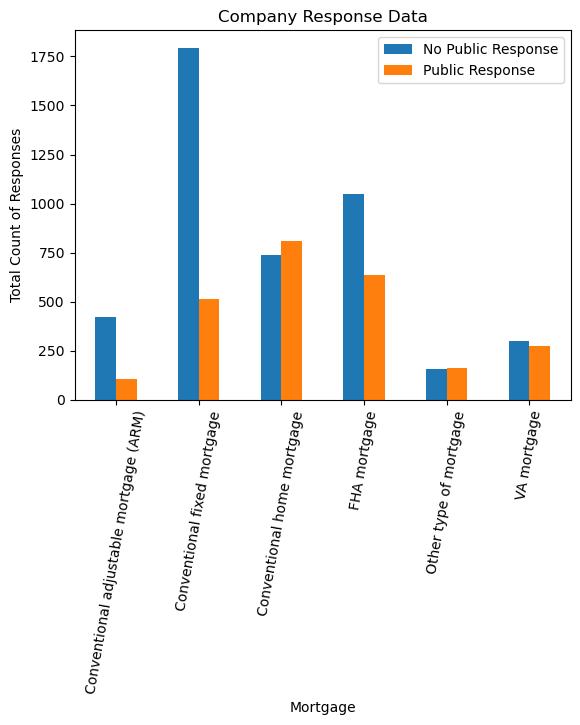

<Figure size 640x480 with 0 Axes>

In [16]:
# Now to add a total count to each Bar
Bar_df.plot(kind="bar")
plt.xticks(rotation=80)
plt.title("Company Response Data")
plt.xlabel("Mortgage")
plt.ylabel("Total Count of Responses")
plt.show()
plt.tight_layout()
plt.savefig('Company_Reponse_Data.png')

In [17]:
# Grouped and created a Data Frame for all mortgages and company consumer responses reported
crcproduct_df = complaints_metadata.groupby('Product')['Company response to consumer']
issuescrc_df = crcproduct_df.get_group('Mortgage').value_counts()
issuescrc_df = pd.DataFrame(issuescrc_df)
issuescrc_df = issuescrc_df.rename(columns={"Company response to consumer": "Total # of Responses"})
issuescrcf_df = pd.DataFrame(issuescrc_df)
issuescrcf_df

,Total # of Responses
Closed with explanation,6047
Closed with non-monetary relief,347
Closed with monetary relief,294
Closed without relief,158
Closed,87
Closed with relief,18
Untimely response,15


In [18]:
# Grouped and created individual mortgages together to obtain total number of company responses to consumer
imortg_grouped_presponse = complaints_metadata.groupby('Sub-product')['Company response to consumer'].value_counts()
imortg_grouped_presponse_df = pd.DataFrame(imortg_grouped_presponse)
imortg_grouped_presponse_df = imortg_grouped_presponse_df.rename(columns={"Company response to consumer": "Total # of Responses"})
imortg_grouped_presponse_df

Total # of Responses
Sub-product                            Company response to consumer                         
Conventional adjustable mortgage (ARM) Closed with explanation                           438
                                       Closed with non-monetary relief                    31
                                       Closed without relief                              25
                                       Closed                                             13
                                       Closed with monetary relief                        13
                                       Closed with relief                                  3
                                       Untimely response                                   1
Conventional fixed mortgage            Closed with explanation                          1909
                                       Closed with monetary relief                       123
                                       Closed with non-monetary relief                   117
                                       Closed without relief                              94
                                       Closed                                             46
                                       Closed with relief                                 14
                                       Untimely response                                   3
Conventional home mortgage             Closed with explanation                          1425
                                       Closed with monetary relief                        61
                                       Closed with non-monetary relief                    61
FHA mortgage                           Closed with explanation                          1479
                                       Closed with non-monetary relief                    99
                                       Closed with monetary relief                        54
                                       Closed without relief                              31
                                       Closed                                             21
                                       Untimely response                                   4
                                       Closed with relief                                  1
Other type of mortgage                 Closed with explanation                           291
                                       Closed with monetary relief                        13
                                       Closed with non-monetary relief                    13
                                       Untimely response                                   5
VA mortgage                            Closed with explanation                           505
                                       Closed with monetary relief                        30
                                       Closed with non-monetary relief                    26
                                       Closed without relief                               8
                                       Closed                                              7
                                       Untimely response                                   2

In [19]:
# Grouped and created a Dataframe for issues individually to obtain total number of company responses to the consumer
issues_grouped_presponse = complaints_metadata.groupby('Issue')['Company response to consumer'].value_counts()
issues_grouped_presponse_df = pd.DataFrame(issues_grouped_presponse)
issues_grouped_presponse_df = issues_grouped_presponse_df.rename(columns={"Company response to consumer": "# of Consumer Responses"})
issues_grouped_presponse_df

# of Consumer Responses
Issue                                              Company response to consumer                            
Application, originator, mortgage broker           Closed with explanation                              336
                                                   Closed with monetary relief                           50
                                                   Closed with non-monetary relief                       23
                                                   Closed                                                11
                                                   Closed without relief                                  8
                                                   Closed with relief                                     3
                                                   Untimely response                                      3
Applying for a mortgage or refinancing an exist... Closed with explanation                              212
                                                   Closed with monetary relief                           18
                                                   Closed with non-monetary relief                        8
                                                   Untimely response                                      1
Closing on a mortgage                              Closed with explanation                              179
                                                   Closed with monetary relief                           20
                                                   Closed with non-monetary relief                        8
                                                   Untimely response                                      1
Credit decision / Underwriting                     Closed with explanation                              131
                                                   Closed with monetary relief                           13
                                                   Closed without relief                                  8
                                                   Closed with non-monetary relief                        4
                                                   Closed                                                 2
                                                   Closed with relief                                     2
                                                   Untimely response                                      1
Improper use of your report                        Closed with explanation                                4
                                                   Closed with non-monetary relief                        2
Incorrect information on your report               Closed with explanation                               69
                                                   Closed with non-monetary relief                        7
Loan modification,collection,foreclosure           Closed with explanation                             1248
                                                   Closed with non-monetary relief                      101
                                                   Closed without relief                                 85
                                                   Closed                                                33
                                                   Closed with monetary relief                            7
                                                   Closed with relief                                     3
                                                   Untimely response                                      2
Loan servicing, payments, escrow account           Closed with explanation                             1649
                                                   Closed with monetary relief                           97
                                                   Closed with non-monetary relief      

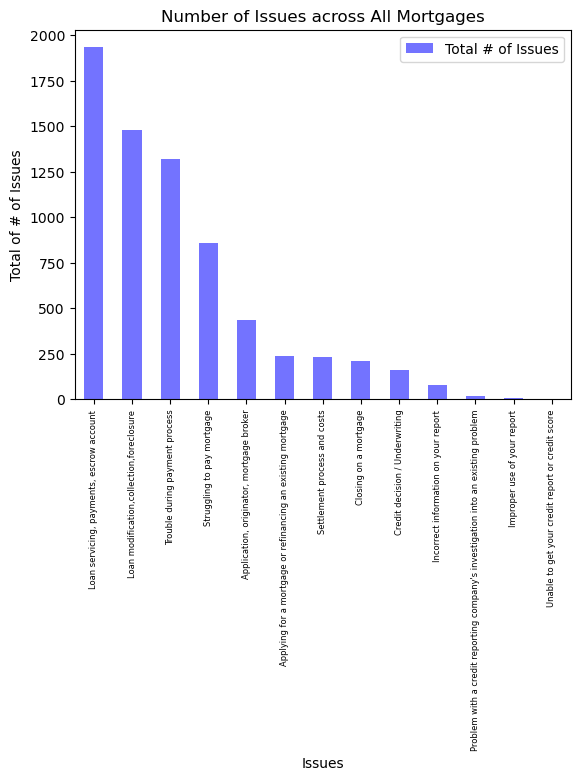

In [20]:
mortf_df.plot.bar(color='b', alpha=0.55, align='center')
plt.title('Number of Issues across All Mortgages')
plt.xticks(rotation='vertical', fontsize=6)
plt.xlabel('Issues')
plt.ylabel('Total of # of Issues')
plt.savefig('All Mortgages_Issues')
plt.show()

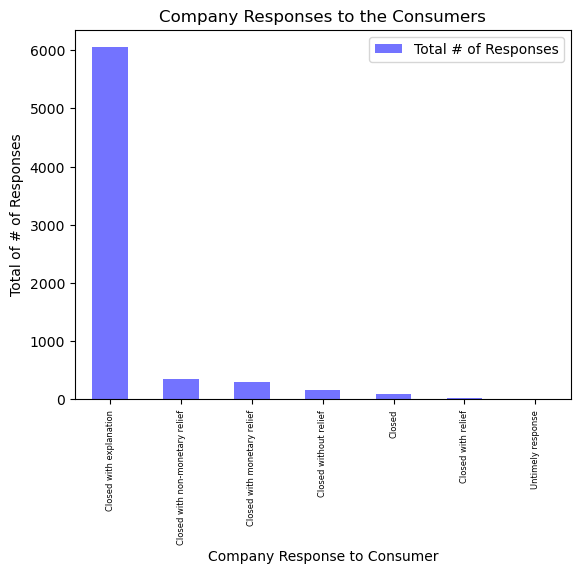

In [21]:
issuescrcf_df.plot.bar(color='b', alpha=0.55, align='center')
plt.title('Company Responses to the Consumers')
plt.xticks(rotation='vertical', fontsize=6)
plt.xlabel('Company Response to Consumer')
plt.ylabel('Total of # of Responses')
plt.savefig('company response2c')
plt.show()